**Status:** In Progress  
**Description**: This personal project focuses on leveraging machine learning techniques for fraud detection, showcasing practical skills in data analysis and model development

# Section 1: Introduction to Fraud Detection
### What is Fraud Detection?

- Fraud detection is the process of detecting anomalous financial records from within a broader set of normal transactions.
- The data is typically tabular in nature i.e. data sets with rows and columns
- It is important to have access to histrorical instances of confirmed fraudulent behaviour i.e. labels or our target variable, which are often issued by a bank or third party
- Because fraud is by definition less frequent than normal behaviour within a financial services ecosystem, there will be far less confirmed historical instances of fraudulent behaviour compared with the known good/normal behaviour, leading to an imbalance between the fraudulent and non-fraudulent samples

- Feature engineering is crucial, as it involves converting domain knowledge from fraud analysts and investigators into data that can be used to detect suspicious behaviours
- The features/data is typically aggregated at the customer-level, or at the transaction-level, depending on the use-case. Some approaches even combine the two
- Network data i.e. how users within a system are connected to one another (if at all), is normally a strong indicator of fraudulent behaviour

- Data sets for fraud detection are notoriously difficulty to access, due to various issues related to data privacy. There are some popular data sets available online, one of which is the ULB Machine Learning Group credit card fraud data set on Kaggle that we'll be using throughout this course


### Exploring the Credit Card Fraud Data Set

- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import os
import pandas as pd

In [2]:
os.chdir(r'C:\Users\manuk\OneDrive\Desktop\Detecting Financial Fraud with Machine Learning\Detecting-Financial-Fraud-with-Machine-Learning\Dataset')

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###  Managing Labels in a Fraud Detection context

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

- Training algorithm would be overwhelmingly baised towards the majority class
- Would not be able to learn anything meaningful from the fraudulent minority class
- we can cater for the imbalance in a number of ways
    - Up sample the minority class at training time (synthetic data)
    - Down sample the majority class
    - Choose an approach better suited to highly imbalanced data i.e. anomaly detection algorithms
    - Re-balance the classes at training time using the algorithm's class_weight hyperparameter to penalize the loss function more for misclassifications made on the minority class (hence improving the algorithm's ability to learn the minority class)

- In machine learning, there are traditionally two main types of modelling approaches:
    - Supervised learning (data has a label or target variable i.e. something to learning and correct itself from)
        - Classification - predicting a categorical value i.e. is fraud yes/no
        - Regression - predicting a continuous value i.e. price
    - Unsupervised (data has no label)
        - Clustering - find the natural groupings within the data
        - Dimensionality reduction - reduce higher dimensional data set down to a lower dimensional space i.e. many columns down to fewer columns to potentially help improve model performance
- Fraud detection is typically a supervised, binary classification problem, but unsupervised learning (both clustering and PCA) can be used
- This data set represents a supervised learning problem (binary (yes/no) classification)

In [7]:
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

## Model validation
- Train set which our model learns from
- Test set (unseen holdout set) which is used to evaluate the effectiveness of the model after training is complete
- Often a 80/20 or 90/10 split depending on the amount of data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (256326, 28)
X_test: (28481, 28)
y_train: (256326,)
y_test: (28481,)


In [9]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
169217,-0.204054,0.773672,-0.508138,-0.504530,1.110237,-0.889531,0.892855,-0.129737,0.067865,-0.706473,...,-0.157602,-0.045248,-0.354026,-0.841090,0.345082,0.463542,-0.357763,0.117770,0.124158,0.049966
127577,1.185899,-0.777605,0.290538,-0.507296,-0.883708,-0.444648,-0.380721,-0.136399,-0.734164,0.441292,...,0.425192,0.249048,0.100304,0.176216,-0.087076,0.117514,0.455406,-0.235654,0.009948,0.026970
155900,0.337897,-0.400062,1.397225,-0.601374,-1.432251,-0.115443,-0.791959,-0.113610,-0.818184,1.161987,...,2.266210,-0.067891,-0.200381,0.177004,0.015208,-0.096025,-0.729801,0.219861,0.203869,0.166661
274954,2.035125,-0.389804,-2.551903,-0.722794,2.380486,3.320923,-0.468416,0.789462,0.402422,0.089469,...,0.020289,-0.138523,-0.288467,-0.839066,0.374619,0.698594,-0.267765,0.218413,-0.053658,-0.065533
250973,1.994644,-0.343013,-0.516240,0.339995,-0.353679,-0.100897,-0.572387,-0.009577,1.255657,-0.167218,...,-0.344320,-0.140784,0.280918,1.054895,0.089021,0.657755,0.014361,-0.165380,0.039714,-0.031416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,-1.241768,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.500426,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,0.278512,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887
17677,-0.598120,0.775041,1.823394,0.312991,-0.096171,-0.391452,0.499351,0.071224,-0.017496,-0.512312,...,-0.238137,0.102259,0.060615,0.568083,-0.084001,0.685003,-0.245859,0.356638,0.378580,0.206366


In [10]:
import numpy as np

print("Fraud in y_train:", len(np.where(y_train == 1)[0]))
print("Fraud in y_test", len(np.where(y_test == 1)[0]))

Fraud in y_train: 443
Fraud in y_test 49


# Section 2: Training a Supervised Learning Model
### Training a Baseline Logistic Regression Model using scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Introducing the Confusion Matrix
- Acts as a cross section between the ground truth and the predictions that the trained model makes
- In a binary classification context, the confusion matrix reports on the classification performance of the model:
    - True negatives - actually non-fraudulent and correctly classified as non-fraudulent
    - False positives - actually non-fraudulent but incorrectly classified as fraud
    - False negatives - actually fraud but incorrectly classified as being non-fraudulent
    - True positives - actually fraud and correctly classified as fraud
- We're trying to detect fraud, so the "positive" relates to fraud while "negative" refers to non-fraudulent.
- "True" relates to correct predictions, whereas "false" refers to incorrect predictions.
- Many performance metrics are derived from the elements of the confusion matrix, therefore it is foundational for understanding how to measure performance for classification problems.

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28426,     6],
       [   15,    34]], dtype=int64)

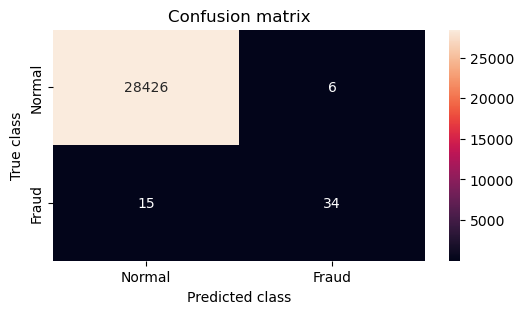

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Improving the Logistic Regression Model through Hyperparameter Selection

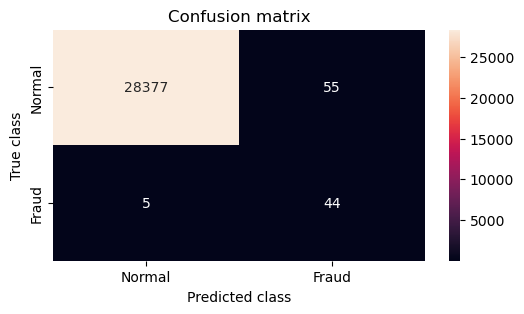

In [15]:
model = LogisticRegression(class_weight={0:1, 1:50})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Interpreting the Logistic Regression Model

In [16]:
model.classes_

array([0, 1], dtype=int64)

In [17]:
# y = mx + c
# B_0 + B_1*x_1 + B_2*x_2 etc 

model.coef_

array([[ 0.11077592, -0.06859069, -0.01967696,  0.88409344,  0.09144915,
        -0.18473897,  0.05203225, -0.36027874, -0.1543006 , -0.61276151,
         0.23644341, -0.58795584, -0.39928999, -0.67522941, -0.11132962,
        -0.42065113, -0.09667066, -0.03722182, -0.09650186, -0.12984166,
         0.29407768,  0.52342799, -0.18790098,  0.00292142,  0.00887645,
        -0.42029811, -0.13369595,  0.03408903]])

In [18]:
model.intercept_

array([-5.61540575])

In [19]:
model.predict_proba(X_test) 

# true probabilities would require model calibration isotonic regression etc
# https://scikit-learn.org/stable/modules/calibration.html

array([[0.98667522, 0.01332478],
       [0.99558961, 0.00441039],
       [0.99587779, 0.00412221],
       ...,
       [0.99220802, 0.00779198],
       [0.99792357, 0.00207643],
       [0.994318  , 0.005682  ]])

# SHAP
- The Shapley value is the average expected marginal contribution of one feature after all possible feature combinations have been considered. 
- Shapley value helps to determine a payoff for all of the features when each feature might have contributed more or less than the others.

In [20]:
import shap
shap.initjs()

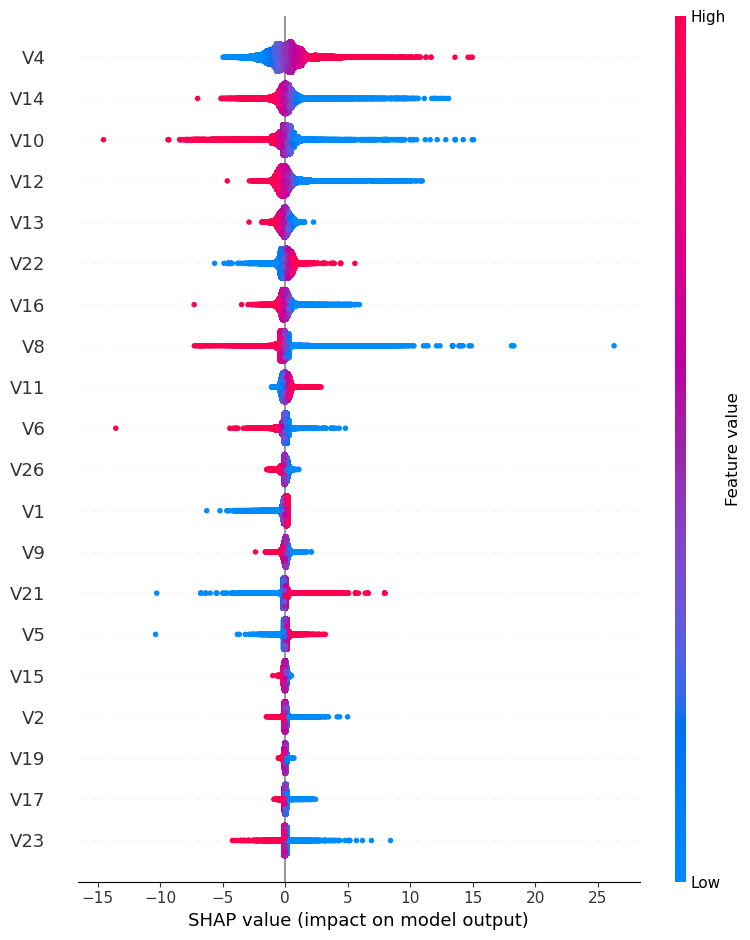

In [21]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

### Training an XGBoost Model

In [22]:
# XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. 
# Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target 
# variable by combining the estimates of a set of simpler, weaker models.

import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]], dtype=int64)

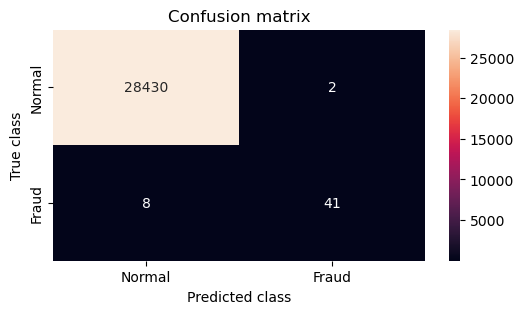

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Improving the XGBoost Model through Hyperparameter Selection

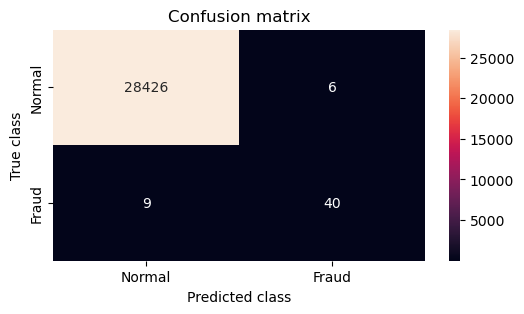

In [26]:
model = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100) 
# max_depth specifies the maximum depth to which each tree will be built.
# reduces overfitting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Interpreting the XGBoost Model

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('creditcard.csv')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [28]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
model.classes_

array([0, 1])

In [30]:
model.feature_importances_

array([0.01312514, 0.00784569, 0.0100591 , 0.05357756, 0.01087751,
       0.00794495, 0.01373471, 0.01787292, 0.00532201, 0.01796621,
       0.01067202, 0.03793157, 0.02628328, 0.5975068 , 0.01172574,
       0.00766153, 0.05387616, 0.00919916, 0.01226081, 0.01598488,
       0.00507836, 0.00916433, 0.01107373, 0.00602694, 0.00522209,
       0.01114778, 0.00378145, 0.00707763], dtype=float32)